In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import pickle
import examples
import openTSNE

%matplotlib inline

import matplotlib.pyplot as plt

from scipy.stats import skew, zscore
df1 = pd.read_csv(r"C:\Users\Usuario\Downloads\INFO VISUALISATION\celeba_buffalo_l.csv")
def subset(df):
	mask = df.columns[~df.columns.str.startswith("emb")]
	subset = df[mask]
	subset = subset.drop(columns = ["image_name", "id"])
	return subset

subset1_features = subset(df1)
def subset_emb_columns(df):
    mask = df.columns[df.columns.str.startswith("emb")]
    subset = df[mask]
    return subset

# Example usage
subset_with_emb_columns = subset_emb_columns(df1)

In [5]:
# Assuming subset1_features and subset_with_emb_columns are your DataFrames

# Generate random seed for reproducibility
np.random.seed(0)

# Create a permutation of indices
indices = np.random.permutation(subset1_features.index)

# Use iloc to select rows based on shuffled indices
x_sample, x_rest = subset1_features.iloc[indices[:25000]], subset1_features.iloc[indices[25000:]]
y_sample, y_rest = subset_with_emb_columns.iloc[indices[:25000]], subset_with_emb_columns.iloc[indices[25000:]]

In [8]:
x_sample_array = x_sample_reset_index.values

# Now use the NumPy array in PerplexityBasedNN
sample_affinities = openTSNE.affinity.PerplexityBasedNN(
    x_sample_array,
    perplexity=500,
    n_jobs=32,
    random_state=0,
    verbose=True,
)

===> Finding 1500 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 100.55 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 23.37 seconds


In [9]:
%time sample_init = openTSNE.initialization.pca(x_sample, random_state=42)

Wall time: 224 ms


In [10]:
%time sample_embedding = openTSNE.TSNE(n_jobs=32, verbose=True).fit(affinities=sample_affinities, initialization=sample_init)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=32, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=2083.33 for 250 iterations...
Iteration   50, KL divergence 3.4520, 50 iterations in 26.8230 sec
Iteration  100, KL divergence 3.4360, 50 iterations in 27.8090 sec
Iteration  150, KL divergence 3.4355, 50 iterations in 26.8530 sec
Iteration  200, KL divergence 3.4355, 50 iterations in 50.7375 sec
Iteration  250, KL divergence 3.4355, 50 iterations in 53.4935 sec
   --> Time elapsed: 185.72 seconds
===> Running optimization with exaggeration=1.00, lr=25000.00 for 500 iterations...
Iteration   50, KL divergence 1.9016, 50 iterations in 57.6398 sec
Iteration  100, KL divergence 1.8327, 50 iterations in 64.0995 sec
Iteration  150, KL divergence 1.8137, 50 iterations in 76.3766 sec
Iteration  200, KL divergence 1.8049, 50 iter

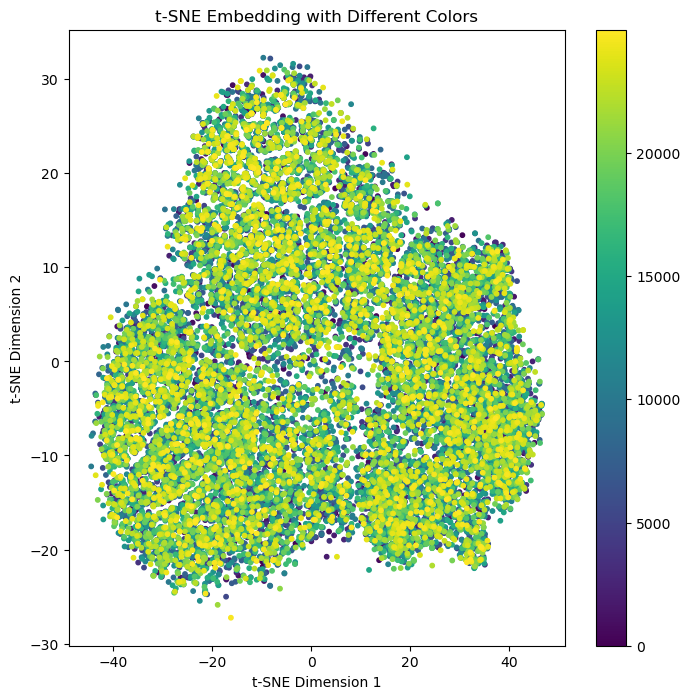

In [13]:
# Assuming `subset1_features` is your DataFrame
# Create a new column 'label' with unique numeric identifiers for each row
subset1_features['label'] = range(len(subset1_features))

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result = sample_embedding

# Scatter plot with different colors based on labels
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding_result[:, 0],
    embedding_result[:, 1],
    c=subset1_features['label'].iloc[:25000],  # Use 'label' column to specify colors
    cmap='viridis',
    s=10
)

plt.title('t-SNE Embedding with Different Colors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()



In [15]:
y_sample_array = y_sample_reset_index.values

# Now use the NumPy array in PerplexityBasedNN
sample_affinities = openTSNE.affinity.PerplexityBasedNN(
    y_sample_array,
    perplexity=500,
    n_jobs=32,
    random_state=0,
    verbose=True,
)

===> Finding 1500 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 120.03 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 13.56 seconds


In [17]:
%time sample_init = openTSNE.initialization.pca(y_sample, random_state=42)

Wall time: 528 ms


In [18]:
%time sample_embedding = openTSNE.TSNE(n_jobs=32, verbose=True).fit(affinities=sample_affinities, initialization=sample_init)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=32, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=2083.33 for 250 iterations...
Iteration   50, KL divergence 3.6030, 50 iterations in 30.5664 sec
Iteration  100, KL divergence 3.6061, 50 iterations in 28.1544 sec
Iteration  150, KL divergence 3.6033, 50 iterations in 27.9166 sec
Iteration  200, KL divergence 3.6027, 50 iterations in 28.1294 sec
Iteration  250, KL divergence 3.6044, 50 iterations in 28.0869 sec
   --> Time elapsed: 142.85 seconds
===> Running optimization with exaggeration=1.00, lr=25000.00 for 500 iterations...
Iteration   50, KL divergence 2.3503, 50 iterations in 28.2843 sec
Iteration  100, KL divergence 2.0937, 50 iterations in 30.2468 sec
Iteration  150, KL divergence 2.0161, 50 iterations in 33.1994 sec
Iteration  200, KL divergence 1.9910, 50 iter

C:\Users\Usuario\AppData\Local\Temp\ipykernel_20380\4016578571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_with_emb_columns['label'] = range(len(subset_with_emb_columns))


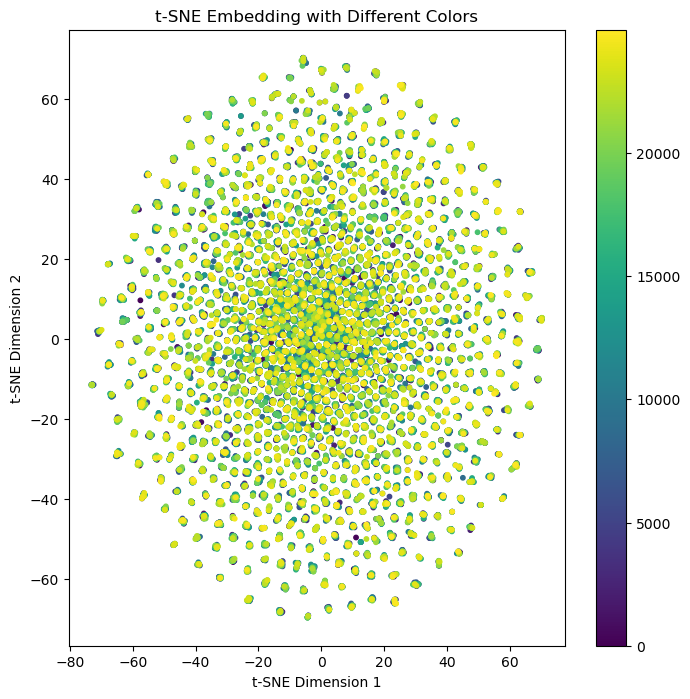

In [19]:
# Assuming `subset1_features` is your DataFrame
# Create a new column 'label' with unique numeric identifiers for each row
subset_with_emb_columns['label'] = range(len(subset_with_emb_columns))

# Assuming `embedding_standard` contains the t-SNE embedding result
embedding_result = sample_embedding

# Scatter plot with different colors based on labels
plt.figure(figsize=(8, 8))
plt.scatter(
    embedding_result[:, 0],
    embedding_result[:, 1],
    c=subset1_features['label'].iloc[:25000],  # Use 'label' column to specify colors
    cmap='viridis',
    s=10
)

plt.title('t-SNE Embedding with Different Colors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar()
plt.show()